In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv("../../../sample/5-3-1-lm-model.csv")
df.head()

,humidity,price,sales,temperature,weather
0,29.5,290,229.7,17.8,rainy
1,38.1,290,206.1,26.1,rainy
2,31.5,290,202.5,22.0,rainy
3,39.7,290,195.5,23.0,rainy
4,24.7,290,214.4,14.5,rainy


#### まずstatsmodelでやってみる

In [3]:
# df['weather']
dummy=pd.get_dummies(df)
dummy.head()

,humidity,price,sales,temperature,weather_rainy,weather_sunny
0,29.5,290,229.7,17.8,1,0
1,38.1,290,206.1,26.1,1,0
2,31.5,290,202.5,22.0,1,0
3,39.7,290,195.5,23.0,1,0
4,24.7,290,214.4,14.5,1,0


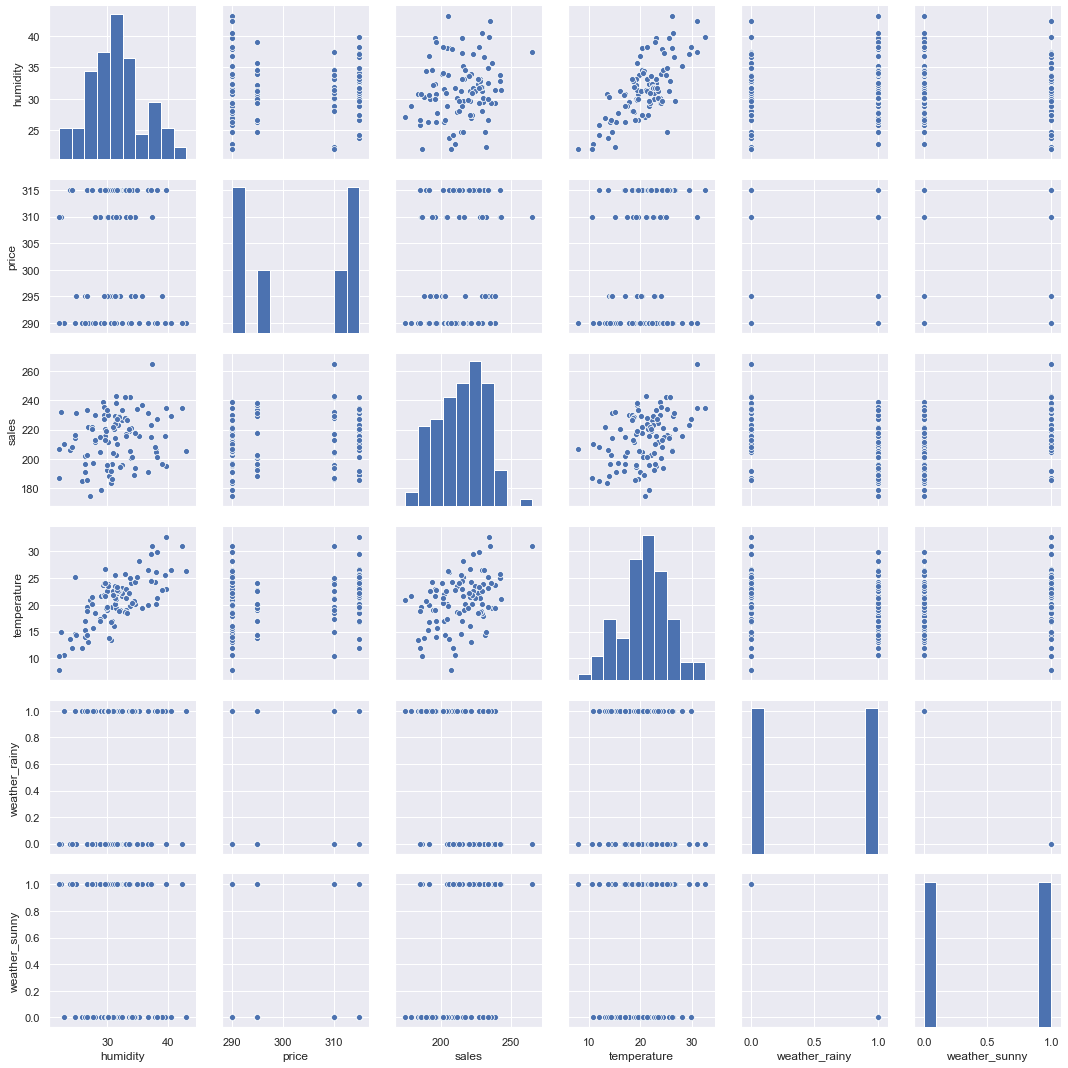

In [4]:
sns.pairplot(data=dummy)

### モデル推定

In [5]:
lm_all=smf.ols("sales ~ weather_rainy + weather_sunny + humidity + temperature + price",data=dummy).fit()

In [6]:
lm_all.params

Intercept        192.414854
weather_rainy     86.212868
weather_sunny    106.201987
humidity          -0.254055
temperature        1.603115
price             -0.329207
dtype: float64

In [7]:
lm_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     16.15
Date:                Fri, 04 Oct 2019   Prob (F-statistic):           4.01e-10
Time:                        08:39:48   Log-Likelihood:                -399.39
No. Observations:                 100   AIC:                             808.8
Df Residuals:                      95   BIC:                             821.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       192.4149     31.530      6.103      0.000     129.821     255.009
weather_rainy    86.2129     14.855      5.804      0.000      56.723     115.703
weather_sunny   106.2020     16.811      6.317      0.000      72.828     139.576
humidity         -0.2541      0.456     -0.558      0.578      -1.159       0.651
temperature       1.6031      0.443      3.620      0.000       0.724       2.482
price            -0.3292      0.155     -2.123      0.036      -0.637      -0.021
==============================================================================
Omnibus:                        0.160   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.923   Jarque-Bera (JB):                0.016
Skew:                          -0.028   Prob(JB):                        0.992
Kurtosis:                       3.027   Cond. No.                     1.91e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.56e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

##### 全ての説明変数入りモデル

In [8]:
lm_all.params

Intercept        192.414854
weather_rainy     86.212868
weather_sunny    106.201987
humidity          -0.254055
temperature        1.603115
price             -0.329207
dtype: float64

In [9]:
lm_all.aic

808.7852007486986

##### 湿度の変数を抜いたモデル

In [10]:
lm_non_humi=smf.ols("sales ~ weather_rainy + weather_sunny + temperature + price",data=dummy).fit()

In [11]:
lm_non_humi.aic

807.1119065232634

In [12]:
lm_non_humi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     21.59
Date:                Fri, 04 Oct 2019   Prob (F-statistic):           9.08e-11
Time:                        08:39:48   Log-Likelihood:                -399.56
No. Observations:                 100   AIC:                             807.1
Df Residuals:                      96   BIC:                             817.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       188.9992     30.818      6.133      0.000     127.827     250.172
weather_rainy    84.3026     14.402      5.853      0.000      55.715     112.891
weather_sunny   104.6965     16.533      6.333      0.000      71.879     137.514
temperature       1.4179      0.292      4.859      0.000       0.839       1.997
price            -0.3260      0.154     -2.112      0.037      -0.632      -0.020
==============================================================================
Omnibus:                        0.096   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.953   Jarque-Bera (JB):                0.054
Skew:                           0.051   Prob(JB):                        0.974
Kurtosis:                       2.952   Cond. No.                     1.43e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.52e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## ガウス-マルコフの定理

In [14]:
dummy.head(3)
len(df)

100

#### 観測値のベクトル

In [17]:
y = np.reshape(dummy.sales.values,(len(dummy),1))
len(y)

100

#### 既知係数の行列

In [26]:
# X=dummy[['humidity','price','temperature','weather_rainy','weather_sunny']].values
X=dummy[['humidity','price','temperature','weather_rainy']].values

# 切片の係数をくっつける
ones=np.reshape(np.ones(len(dummy)),(len(dummy),1))
X=np.concatenate([ones,X],axis=1)

#### 正規方程式(X'X)

In [27]:
V = np.dot(X.T,X)

##### の逆行列

In [28]:
V_ = np.linalg.inv(V)

#### 未知母数のベクトルを求める

In [36]:
B = np.dot(V_,np.dot(X.T,y))
B

array([[ 2.98616841e+02],
       [-2.54054746e-01],
       [-3.29207353e-01],
       [ 1.60311495e+00],
       [-1.99891190e+01]])

In [48]:
B[0] # Intercept

array([298.61684122])

In [47]:
B[2] # price

array([-0.32920735])

In [42]:
B[3] # temperature

array([1.60311495])

In [43]:
lm_all.params

Intercept        192.414854
weather_rainy     86.212868
weather_sunny    106.201987
humidity          -0.254055
temperature        1.603115
price             -0.329207
dtype: float64

#### 確認

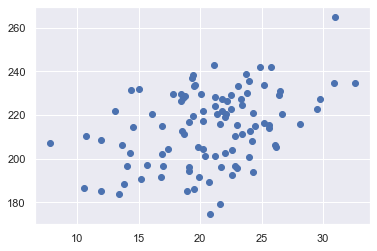

In [44]:
plt.plot(dummy.temperature,dummy.sales,"o")

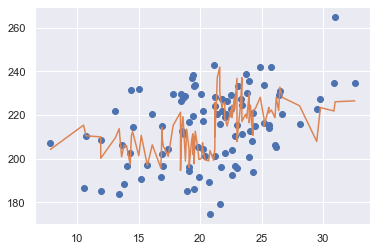

In [45]:
Y=np.dot(X,B)
plt.plot(dummy.temperature,dummy.sales,"o")
plt.plot(np.sort(X[:,3]),np.sort(Y))